In [1]:
from __future__ import print_function

# The Training Process

As we saw in the slides about linear regression, the training process is an _iterative_ optimization problem.  This leaves us with the "best" model we can get.

But how good is that model?

# Evaluating Model Quality

To evaluate a model, we need a way to measure its performance.  This area is _huge_ and could probably be a course (or at least half) on its own.

There are many choices.  For classification, we have:

* accuracy
* Precision
* Recall
* F1-score
* ...

For regression we have:

* Mean Squared Error (MSE)
* $R^2$ score
* ...

# Accuracy

Accuracy is the first metric everyone thinks of.   Think of it like a test.  Accuracy is the score on the test:


$$\frac{correct}{total}$$

Pros:  Easy to compute, easy to understand

Cons:  Does not discriminate between type I and type II errors, does not handle class imbalance

In [2]:
# how many of the values were correct out of all of them?

## HIGH VALUE == good
## LOW VALUE == bad

# value maxes out at 1

# Precision

Precision is (also called positive predictive value) is the fraction of relevant instances among the retrieved instances.

$$\frac{true positives}{true positives + false positives}$$

Intuitively, your precision is good if you don't claim something is in a class when it isn't.

In [3]:
# how many values were actually properly acquired...?
# how many of these values are relevant?

# high precision means all the claims are true

## HIGH VALUE == good
## value maxes out at 1

# Recall

Recall is (also known as sensitivity) is the fraction of relevant instances that have been retrieved over the total amount of relevant instances.

$$\frac{true positives}{true positives + false negatives}$$

Intuitively, your recall is good if you capture most of the actual positive, even if you mistakenly call something positive when it isn't.  

Note that you can trivially get 100% recall by always saying "positive"!

In [4]:
# do you capture all positive values?...

# values max out at 1

# F1-score

* This measure combines precision and recall into a single metric.  
* Computed as the harmonic mean of precision and recall:  $2\frac{precision * recall}{precision + recall}$
* By default (F1) it's evenly weighted to prefer one over the other.
* Other variations can alter the weighting to prefer precision or recall

Pros:  It's a single number that captures a lot of detail
Cons:  It's a single number that captures a lot of detail, so some is lost or "glossed over"

In [5]:
# F1-score is a measurement taking into account both precision and recall

# max value is 1

# Confusion Matrix

The confusion matrix for a classifier is a table-oriented display that shows how many of the evaluation samples fall into each bucket:  true positive, true negative, false positive, and false negative.

![precision-recall-confusion-matrix-diagram.png](precision-recall-confusion-matrix-diagram.png)

#  Let's revisit our classifier and see how it performed.

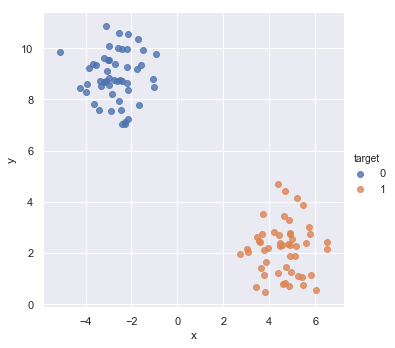

In [6]:
#  Re-add in classification code here
#  Some boilerplate for visualization...
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

from pandas import DataFrame
from sklearn.datasets import make_blobs

#  Note: Make the cluster_std parameter > 1 to make the blobs less distinct
#  This makes the classification problem harder and shows how the scores change.
X, y = make_blobs(n_features=2, centers=2, random_state=42, cluster_std=1) 
df = DataFrame(X)

#  Add the target variable into the dataframe (this let's seaborn color based on it)
df['target'] = y

#  Name the columns for sanity's sake...
df.columns = ['x', 'y', 'target']

#  Plot the blobs
facetgrid = sns.lmplot(data=df, x='x', y='y', hue='target', fit_reg=False)

In [7]:
#  Now we build the model.
from sklearn.linear_model import LogisticRegression

#  Let's create a logistic regression classifier 
#  (we'll talk about the details of this later)
#
#  In sklearn parlance, this is an Estimator and can be .fit()
#  to data and can .predict() on data.
clf = LogisticRegression()
clf.fit(X, y)

#  Now we're done training.
new_examples = [
    [-4, 10],
    [10, -4]
]

#  Let's see where we predict these new samples lie.
clf.predict(new_examples)

array([0, 1])

In [8]:
#  Let's look at some metrics
from sklearn.metrics import (accuracy_score, f1_score, 
                             precision_score, recall_score,
                             classification_report, confusion_matrix)

y_pred = clf.predict(X)

for metric in (accuracy_score, precision_score, recall_score, f1_score):
    print('%s: %r' % (str(metric.__name__), metric(y, y_pred)))
    
print('\nClassification Report:')
print(classification_report(y, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y, y_pred))

accuracy_score: 1.0
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       100


Confusion Matrix:
[[50  0]
 [ 0 50]]


In [9]:
# support is number of samples which are classified under your system?... can spot class imbalance between one and zero

#  Overfitting

One crucial thing I haven't talked about yet is "overfitting".  

Recall that the goal of ML is normally _prediction_.  We don't want to simply explain the data we've seen, but we want to use what we've observed to be able to _predict_ what is likely the target value for _unseen data_.

Abstractly, overfitting is when you come close to "memorizing" your data set.  It means you perform very well on the training data set, but your model doesn't _generalize well_ to unseen data.